### 1. Хотим пятерку, а на деле...

Кластеризуйте данный датасет с помощью метода `k-means`. На основе трёх различных __внутренних__ метрик оценки кластеризации, подберите наилучшее количество кластеров $k$.

In [41]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.linalg as slg
import sklearn.metrics
from mpl_toolkits.mplot3d import Axes3D
sns.set(palette='Set2')
from sklearn.decomposition import PCA

from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from scipy.optimize import minimize
import itertools as it

from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score, homogeneity_score, completeness_score # Внешние метрики
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score # Внутренние метрики (не использую label)

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

Number of Clusters | Silhouette Score | Davies-Bouldin Score | Calinski-Harabasz Score
2                  | 0.35288714222811035 | 1.1773858280725187    | 174.47553792472578   
3                  | 0.38719827637716536 | 0.8383371834530481    | 239.1080527800846    
4                  | 0.3761137438572018 | 0.8122290029473103    | 266.8364739251034    
5                  | 0.35874787949063935 | 0.8441900114616641    | 276.37694570724943   
6                  | 0.33064553744581415 | 0.9092613339494249    | 268.5671061680736    


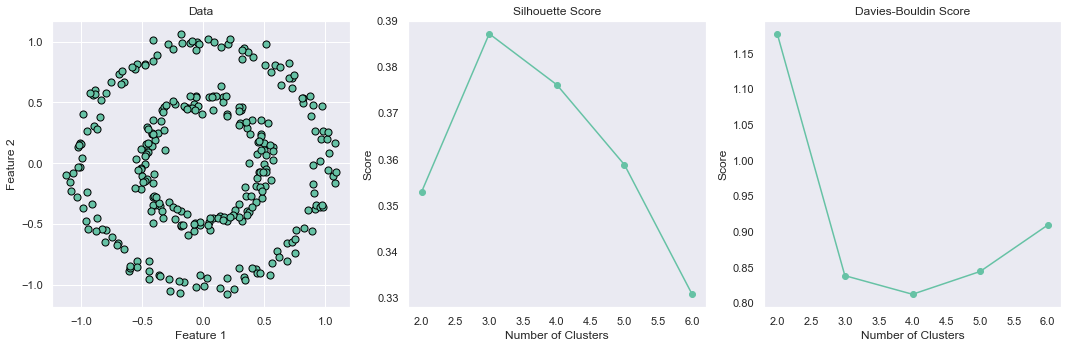

In [39]:
# датасет
X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=1)

# диапазон числа кластеров
range_n_clusters = [2, 3, 4, 5, 6]

# списки для хранения результатов метрик
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

# Проход по диапазону числа кластеров и оценка каждого k
for n_clusters in range_n_clusters:
    # Создаём и обучаем модель k-means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    
    # метки кластеров
    labels = kmeans.labels_
    
    # качество кластеризации с использованием метрик
    silhouette_score_value = silhouette_score(X, labels)
    davies_bouldin_score_value = davies_bouldin_score(X, labels)
    calinski_harabasz_score_value = calinski_harabasz_score(X, labels)
    
    
    silhouette_scores.append(silhouette_score_value)
    davies_bouldin_scores.append(davies_bouldin_score_value)
    calinski_harabasz_scores.append(calinski_harabasz_score_value)

print("Number of Clusters | Silhouette Score | Davies-Bouldin Score | Calinski-Harabasz Score")
for i in range(len(range_n_clusters)):
    print(f"{range_n_clusters[i]:<18} | {silhouette_scores[i]:<16} | {davies_bouldin_scores[i]:<21} | {calinski_harabasz_scores[i]:<21}")


plt.figure(figsize=(15, 5))


plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], s=50, edgecolor='k')
plt.title('Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')


plt.subplot(132)
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.grid()


plt.subplot(133)
plt.plot(range_n_clusters, davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.grid()

plt.tight_layout()
plt.show()

### 2. Повторение - мать ученья

Для предыдущего датасета подберите наилучшие гиперпараметры (мера несходства) с использованием агломеративного метода. Постройте дендрограмму для наилучшей модели. 

Best Silhouette Score: 0.36643297342856773
Best Davies-Bouldin Score: 0.8152495342260768
Best Calinski-Harabasz Score: 242.52170051779015


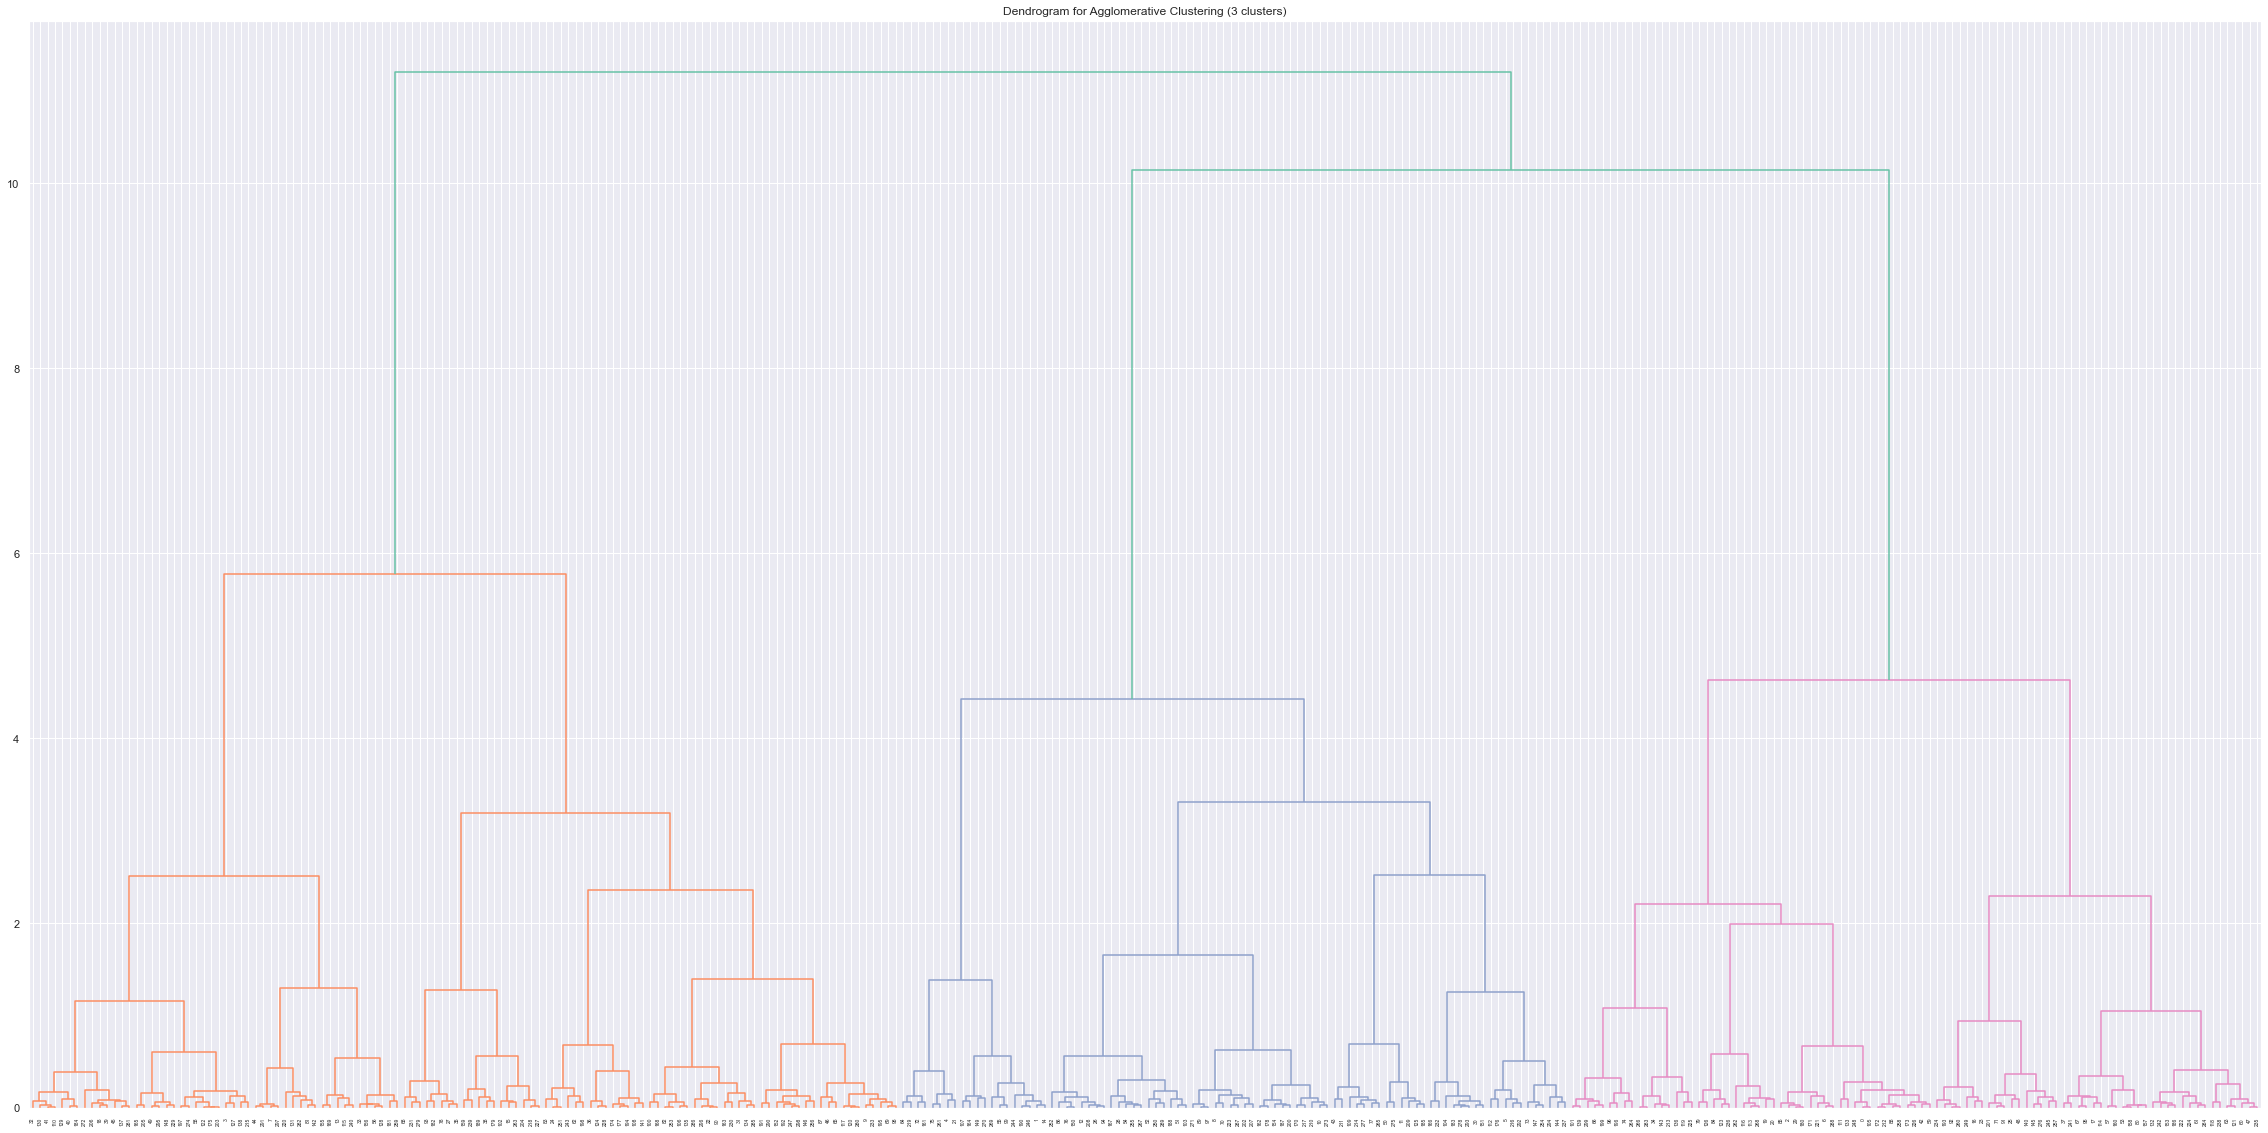

In [46]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Создайте датасет с помощью make_circles
X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=1)

# Определите разные меры несходства и гиперпараметры
linkage_methods = ['ward', 'complete', 'average', 'single']
n_clusters_range = range(2, 7)

best_silhouette_score = -1
best_davies_bouldin_score = float('inf')
best_calinski_harabasz_score = -1
best_model = None

for linkage_method in linkage_methods:
    for n_clusters in n_clusters_range:
        # Создайте и обучите агломеративную модель
        agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
        labels = agglomerative.fit_predict(X)

        # Оцените качество кластеризации
        silhouette_score_value = silhouette_score(X, labels)
        davies_bouldin_score_value = davies_bouldin_score(X, labels)
        calinski_harabasz_score_value = calinski_harabasz_score(X, labels)

        if silhouette_score_value > best_silhouette_score:
            best_silhouette_score = silhouette_score_value
            best_silhouette_model = agglomerative

        if davies_bouldin_score_value < best_davies_bouldin_score:
            best_davies_bouldin_score = davies_bouldin_score_value
            best_davies_bouldin_model = agglomerative

        if calinski_harabasz_score_value > best_calinski_harabasz_score:
            best_calinski_harabasz_score = calinski_harabasz_score_value
            best_calinski_harabasz_model = agglomerative

plt.figure(figsize=(40, 20))
            
# Выведите наилучшие результаты для каждой метрики
print("Best Silhouette Score:", best_silhouette_score)
print("Best Davies-Bouldin Score:", best_davies_bouldin_score)
print("Best Calinski-Harabasz Score:", best_calinski_harabasz_score)

# Постройте дендрограмму для наилучшей модели
linkage_matrix = linkage(X, method=best_silhouette_model.linkage)
dendrogram(linkage_matrix)
plt.title(f'Dendrogram for Agglomerative Clustering ({best_silhouette_model.n_clusters} clusters)')
plt.show()

### 3. Матрица расстояний (смежности) и матрица сходств

Расстояния между парами векторов из двух множеств $d\left(X_l, X_j\right)$ могут быть представлены в виде симметричной матрицы расстояний (матрица смежности):

$$
D=\left(\begin{array}{cccc}
0 & d_{12} & \ldots & d_{1 n} \\
d_{21} & 0 & \ldots & d_{2n} \\
\ldots & \ldots & \ldots & \ldots \\
d_{n 1} & d_{n 2} & \ldots & 0
\end{array}\right)
$$

Понятием, противоположным расстоянию, является понятие сходства между объектами. Неотрицательная вещественная функция $S\left(x_i , x_j\right)=S_{i j}$ называется __мерой сходства__, если:


1) $0 \leq S\left(x_i, x_j\right)<1$ для $x_i \neq x_j$

2) $S\left(x_i, x_i\right)=1$

3) $S\left(x_i, x_j\right)=S\left(x_j, x_i\right)$

Пары значений мер сходства можно объединить в __матрицу сходства__:

$$
S=\left(\begin{array}{cccc}
1 & s_{12} & \ldots & s_{1 n} \\
s_{21} & 1 & \ldots & s_{2 n} \\
s_{n 1} &  s_{n 2} & \ldots & 1
\end{array}\right)
$$

Величину $S_{i j}$ называют __коэффициентом сходства__.

Постройте матрицу смежности по датасету первой задачи, взяв в качестве меры расстояния евклидову метрику.

Постройте на основе неё какую-нибудь матрицу сходства (вам надо самим придумать функцию сходства - просто удовлетвроите трём свойствам).

Визуализируйте обе матрицы в виде картинки. Используйте imshow() или pcolormesh() из Matplotlib.

Для получения матриц используйте функцию  [sklearn.metrics.pairwise_distances ](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html#sklearn.metrics.pairwise_distances) (тут можно в качестве метрики использовать свою собственную функцию - так можно сделать матрицу сходств) или какую-то другую отсюда https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.pairwise

Можно также посмотреть здесь https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors , например, функцию neighbors.[kneighbors_graph](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.kneighbors_graph.html#sklearn.neighbors.kneighbors_graph) 

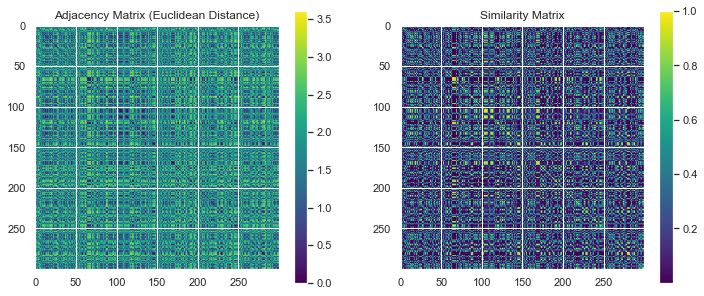

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler

# Создайте или загрузите ваш датасет
n_samples = 300
n_features = 2
X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=4, cluster_std=1.0, random_state=42)

# Стандартизируйте данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Вычислите матрицу смежности с использованием евклидовой метрики
adjacency_matrix = pairwise_distances(X_scaled, metric='euclidean')

# Создайте функцию для вычисления матрицы сходства
def similarity_matrix(adjacency_matrix):
    # Примените простую функцию сходства: exp(-d^2), где d - расстояние в матрице смежности
    return np.exp(-adjacency_matrix**2)

# Получите матрицу сходства
similarity_matrix = similarity_matrix(adjacency_matrix)

# Визуализируйте матрицу смежности
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(adjacency_matrix, cmap='viridis')
plt.title('Adjacency Matrix (Euclidean Distance)')
plt.colorbar()

# Визуализируйте матрицу сходства
plt.subplot(1, 2, 2)
plt.imshow(similarity_matrix, cmap='viridis')
plt.title('Similarity Matrix')
plt.colorbar()

plt.show()

### 4. Игрушечные галактики (Источник - Pelican :))
​
Следующий датасет содержит координаты в 3д некоторого набора галактик. Необходимо найти скопления этих самых галактик с помощью алгоритма `hdbscan` - смеси обычного dbscan и иерархического подхода. Точная формулировка задачи после кода.
​
Вам понадобится файл toy_galaxies.csv из гугл диска.

,x,y,z,label
0,-35.283431,-21.779673,-113.964124,1.0
1,-35.603636,-18.430420,-113.298009,1.0
2,-34.202934,-22.362906,-106.979709,1.0


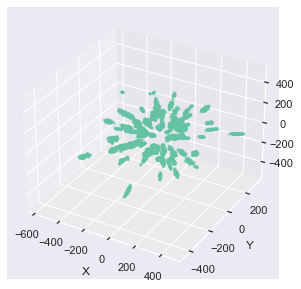

In [52]:
import pandas as pd
import hdbscan
from sklearn.metrics import adjusted_rand_score

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
#!pip install hdbscan
import hdbscan
from sklearn.metrics import adjusted_rand_score as ari
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import MeanShift, AgglomerativeClustering


data = pd.read_csv("toy_galaxies.csv") # Не забудьте скачать файл
display(data.head(3))

# Отобразим датасет
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
Axes3D.scatter(ax, data.x,data.y,data.z, marker='.')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [53]:
# Эта функция понадобится для отображения результата кластеризации и ARI
def plot_galaxies(data,cluster):
    fig = plt.figure(figsize=(5,5))

    ax = fig.add_subplot(111, projection='3d')
    Axes3D.scatter(ax,data.x, data.y, data.z, marker='.', c=cluster.labels_);
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show();

    ARI = round(ari(data.label,cluster.labels_),4) # считаем ARI - оценка качества кластеризации


    print('ARI = {}'.format(ARI))

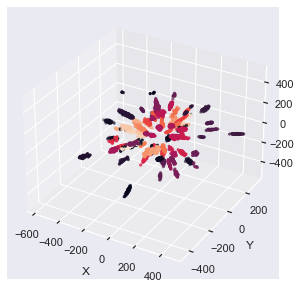

ARI = 0.9131


In [63]:
# hdbscan работает следующим образом
cluster = hdbscan.HDBSCAN(metric="euclidean",
                          min_cluster_size = 5,
                          algorithm="generic",
                          alpha=0.9,
                          cluster_selection_method='eom')

cluster.fit(data[['x','y','z']].to_numpy())

plot_galaxies(data,cluster) # Отображаем кластеризацию и полученный ARI

### 5. *EM-алгоритм

Задача матричного разложения (аппроксимация матрицы произведением двух других матриц меньшего ранга) с ограничениями (например, условие положительности элементов) не решается в общем случае с помощью сингулярного разложения. Для решения такой задачи может использоваться ЕМ-алгоритм. Изучим его на примере другой простой модельной задачи.

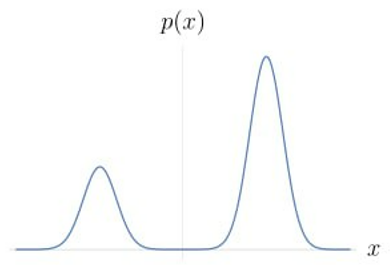

Пусть дана выборка точек $x_i$, взятая из смеси гауссовых распределений:

$$
p(x)=\alpha \cdot \mathcal{N}_{\mu_1, \sigma_1}(x)+(1-\alpha) \cdot \mathcal{N}_{\mu_2, \sigma_2}(x) .
$$

Тогда можно поставить задачу оценки параметров $\alpha, \mu_1, \mu_2, \sigma_1, \sigma_2$ по выборке $\left\{x_i\right\}$.
- Покажите, что задача максимизации обычного правдоподобия $\prod_i p\left(x_i\right) \longrightarrow \max _{\alpha, \mu_1, \mu_2}$ плохо определена. Какие значения параметров максимизируют такое правдоподобие?
- Сгенерируйте данные (просто два сгустка точек, хорошо видных при реализации) и найдите параметры $\alpha, \mu_1, \mu_2, \sigma_1, \sigma_2$ с помощью ЕМ-алгоритма. Инициализировать параметры можно какими-то случайными значениями.
ЕМ-алгоритм состоит из двух чередующихся шагов:
>1. M(Maximization)-шаг. Относим каждую точку $x_i$ к первой или второй гауссиане, сравнивая значения правдоподобия для каждой компоненты смеси:
>
>$$
a\left(x_i\right)= \begin{cases}1, & p_1\left(x_i\right)>p_2\left(x_i\right), \\ 2, & p_2\left(x_i\right)>p_1\left(x_i\right),\end{cases}
$$
>
>где $p_1(x)=\alpha \mathcal{N}_{\mu_1, \sigma_1}(x), \; \; p_2(x)=(1-\alpha) \mathcal{N}_{\mu_2, \sigma_2}(x)$.
>
>2. E( Expectation)-шаг. Находим параметры $\mu_1, \sigma_1$ и $\mu_2, \sigma_2$, максимизируя правдоподобие (или его логарифм) отдельно по точкам, отнесенным к каждой гауссиане:
>
>$$
\begin{gathered}
\prod_{x_i: a\left(x_i\right)=1} p_1\left(x_i\right) \longrightarrow \max _{\mu_1, \sigma_1} \\
\prod_{x_i: a\left(x_i\right)=2} p_2\left(x_i\right) \longrightarrow \max _{\mu_2, \sigma_2}
\end{gathered}
$$

__Примечание.__ При нахождении параметра $\alpha$ можно оптимизировать обычное правдоподобие $\prod_i p\left(x_i\right)$. Все такие максимизации правдоподобия осушествляются аналитически в общем виде для гауссовых распределений. 

__Реализуйте ЕМ-алгоритм.__ Так как метод является итерационным, необходимо выбрать какой-либо критерий остановки, например, прекращать процес, если относительное изменение каждого параметра при очередном шаге меньше некоторого порога. С какой точностью удалось восстановить $\alpha, \mu_1, \mu_2, \sigma_1, \sigma_2$ ?

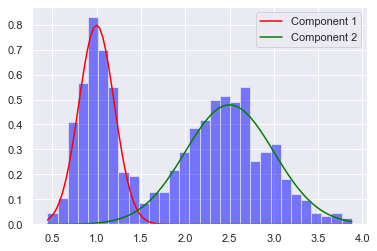

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Генерация данных: два сгустка точек
np.random.seed(0)

# Параметры исходных распределений
alpha_true = 0.4
mu1_true = 1.0
sigma1_true = 0.2
mu2_true = 2.5
sigma2_true = 0.5

# Создание данных
n_samples = 1000
n_samples_comp1 = int(alpha_true * n_samples)
n_samples_comp2 = n_samples - n_samples_comp1

data_comp1 = np.random.normal(mu1_true, sigma1_true, n_samples_comp1)
data_comp2 = np.random.normal(mu2_true, sigma2_true, n_samples_comp2)
data = np.concatenate((data_comp1, data_comp2))

# Визуализация данных
plt.hist(data, bins=30, density=True, alpha=0.5, color='b')

# Определение плотности вероятности для каждой компоненты
x = np.linspace(data.min(), data.max(), 100)
pdf_comp1 = norm.pdf(x, loc=mu1_true, scale=sigma1_true)
pdf_comp2 = norm.pdf(x, loc=mu2_true, scale=sigma2_true)

plt.plot(x, alpha_true * pdf_comp1, 'r', label='Component 1')
plt.plot(x, (1 - alpha_true) * pdf_comp2, 'g', label='Component 2')
plt.legend(loc='best')
plt.show()

In [66]:
# Инициализация параметров случайными значениями, удовлетворяющими ограничениям
alpha = np.random.rand()
mu1 = np.random.rand()
mu2 = np.random.rand()
sigma1 = np.random.rand()
sigma2 = np.random.rand()

epsilon = 1e-6  # Порог остановки

prev_alpha, prev_mu1, prev_mu2, prev_sigma1, prev_sigma2 = alpha, mu1, mu2, sigma1, sigma2

while True:
    # E-шаг: Оценка скрытых переменных (какая гауссова компонента сгенерировала каждую точку)
    component1_pdf = norm.pdf(data, loc=mu1, scale=sigma1)
    component2_pdf = norm.pdf(data, loc=mu2, scale=sigma2)
    responsibilities = (alpha * component1_pdf) / (alpha * component1_pdf + (1 - alpha) * component2_pdf)

    # M-шаг: Обновление параметров модели
    N1 = np.sum(responsibilities)
    N2 = data.shape[0] - N1
    alpha = N1 / data.shape[0]
    mu1 = np.sum(responsibilities * data) / N1
    mu2 = np.sum((1 - responsibilities) * data) / N2
    sigma1 = np.sqrt(np.sum(responsibilities * (data - mu1) ** 2) / N1)
    sigma2 = np.sqrt(np.sum((1 - responsibilities) * (data - mu2) ** 2) / N2)

    # Проверка критерия остановки
    delta_alpha = abs(alpha - prev_alpha)
    delta_mu1 = abs(mu1 - prev_mu1)
    delta_mu2 = abs(mu2 - prev_mu2)
    delta_sigma1 = abs(sigma1 - prev_sigma1)
    delta_sigma2 = abs(sigma2 - prev_sigma2)

    if delta_alpha < epsilon and delta_mu1 < epsilon and delta_mu2 < epsilon and delta_sigma1 < epsilon and delta_sigma2 < epsilon:
        break  # Прекращаем итерации, так как параметры сходятся с заданной точностью

    prev_alpha, prev_mu1, prev_mu2, prev_sigma1, prev_sigma2 = alpha, mu1, mu2, sigma1, sigma2

# Оцененные параметры смеси гауссовых распределений
print("Оцененные параметры:")
print(f"alpha: {alpha}")
print(f"mu1: {mu1}")
print(f"sigma1: {sigma1}")
print(f"mu2: {mu2}")
print(f"sigma2: {sigma2}")

Оцененные параметры:
alpha: 0.5965136167077244
mu1: 2.478670698621948
sigma1: 0.48603715868938674
mu2: 0.9969036856586792
sigma2: 0.19946185756531087
